In [1]:
%load_ext autoreload
%autoreload 2
from types import SimpleNamespace
import json
import os
import tqdm
from dataset import CatDataset
from skimage import io
import numpy as np
from skimage.restoration import inpaint_biharmonic
from tqdm import tqdm
import json
import pathlib
import matplotlib.pyplot as plt

# Load settings

In [2]:
# Read JSON data from a file
with open('my_inpaint_config.json', 'r') as json_file:
    json_data = json_file.read()

# Parse JSON data into a dictionary
settings = json.loads(json_data)

# ADD DATASET
settings["data_set"] =  "test_200"

# Extract information
output_data_dir = settings["dirs"]["output_data_dir"]
data_set = settings["data_set"]
team_name = settings["team_data"]["name"]
method_name = settings["training_parms"]["method"]
inpainted_result_dir = os.path.join(output_data_dir, f"inpainted_{method_name}_{data_set}")
pathlib.Path(inpainted_result_dir).mkdir(parents=True, exist_ok=True)

# Load data

In [7]:
dataset = CatDataset(settings, test = True)
file_ids = dataset.file_ids

In [8]:
def show_img(img, mask, generated_img):
    _, ax = plt.subplots(1, 3, figsize=(12,4))
    ax[0].imshow(np.moveaxis(img, 0, -1))  # Transpose the array to (360, 360, 3)
    ax[0].axis('off') 
    ax[1].imshow(mask)  # Transpose the array to (360, 360, 3)
    ax[1].axis('off')
    ax[2].imshow(generated_img)  # Transpose the array to (360, 360, 3)
    ax[2].axis('off')
    # Turn off axes
    plt.show()

In [11]:
with tqdm(total=len(file_ids)) as pbar:
    for file_id, data in zip(file_ids, dataset):
        img_w_mask, _, _ = data
        img, mask  = img_w_mask[:3].numpy(), img_w_mask[3].numpy()
        generated_img = inpaint_biharmonic(img, mask, channel_axis=0)
        generated_img = (generated_img*255).astype(np.uint8)
        generated_img = np.moveaxis(generated_img, 0, -1)
        generated_img_name = os.path.join(inpainted_result_dir, f"{file_id}.png")
        io.imsave(generated_img_name, generated_img)
        pbar.update(1) 

100%|██████████| 200/200 [09:05<00:00,  2.73s/it]


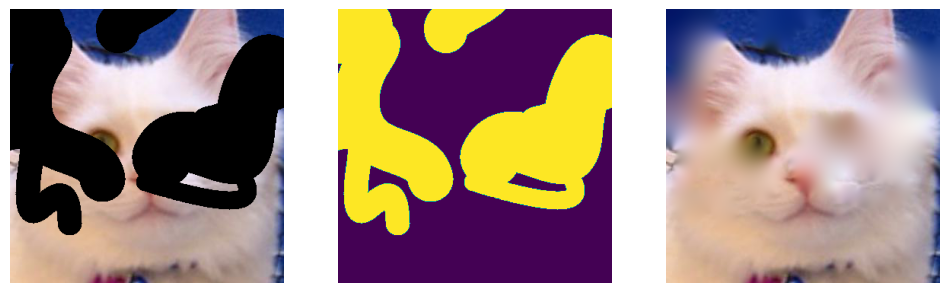

In [12]:
show_img(img, mask, generated_img)